In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
path = '../data/casaData/'
df_listings = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_10316/196199595.py:2: DtypeWarning: Columns (0,4,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings = pd.read_csv(path + 'trainListings.csv', header=0, usecols=[x for x in range(17)])


In [3]:
df_listings['id_clean'] = pd.to_numeric(df_listings['id'], errors='coerce')
df_listings = df_listings.dropna(subset='id_clean')
df_listings['id_clean'] = df_listings['id_clean'].astype(int)

In [4]:
df_listings.drop('id',axis=1, inplace=True)

In [5]:
df_listings.isna().sum()

sourceId           0
locationId         7
typeId             2
price           6176
rooms          74564
bedrooms       12843
bathrooms      14823
totalArea      26340
livingArea     52130
plotArea       38794
terraceArea    65921
title           4304
description     2861
features       40718
latitude       67125
longitude      67355
id_clean           0
dtype: int64

In [6]:
df_listings.loc[df_listings['rooms']!=df_listings['bedrooms']]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83048,10.0,86.0,7.0,315000.0,NaN,2.0,2.0,140.0,110.0,NaN,30.0,Lovely apartment in the popular area of Son Ar...,Situated only 50 metres away from the verdant ...,NaN,NaN,NaN,105041
83049,51.0,109.0,1.0,310000.0,NaN,3.0,2.0,88.0,88.0,NaN,NaN,Charming apartment in Calo d’en real,Details:\n\t\t\t\t\t\tThe apartment is located...,NaN,38.9213,1.29438,105042
83050,325.0,120.0,5.0,310000.0,NaN,3.0,1.0,85.0,NaN,NaN,NaN,Calo den Real Ria,very nice house at the privae residence of Cal...,Bedroom(s): 3\n\t \t\t\t\t\t\t\n\t\t\tBathroo...,38.92,1.22719,105043
83051,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,105044


#### Source ID 

In [7]:
sourceId = df_listings.groupby('sourceId')['id_clean'].count().reset_index(name='listing_count')

In [8]:
sourceId.head()

,sourceId,listing_count
0,1.0,3520
1,2.0,1851
2,3.0,246
3,4.0,1117
4,5.0,958


In [9]:
len(sourceId)

246

In [10]:
sourceId.sort_values(by='listing_count', ascending=False).head(10)

,sourceId,listing_count
0,1.0,3520
21,39.0,2626
8,9.0,2614
13,14.0,2612
10,11.0,2494
19,37.0,2328
245,367.0,2327
204,299.0,2177
30,52.0,2140
1,2.0,1851


In [11]:
# simplify sourceId to source groups based on amount of postings
# assumption that smaller firms have less positings than larger firms 
cut_labels=['v_small', 'small', 'medium', 'large', 'v_large']
sourceId['qcuts'] = pd.qcut(
    sourceId['listing_count'],
    q=[0,0.20,0.4,0.6,0.8,1],
    labels=cut_labels)

In [12]:
sourceId['qcuts'].value_counts()

v_small    50
small      49
medium     49
large      49
v_large    49
Name: qcuts, dtype: int64

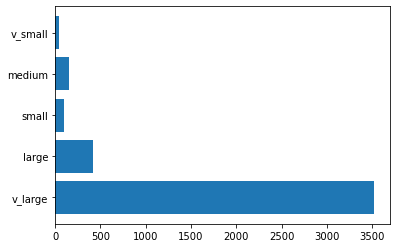

In [13]:
plt.barh(data=sourceId, y='qcuts', width='listing_count')
plt.show()

In [14]:
sourceId.head()

,sourceId,listing_count,qcuts
0,1.0,3520,v_large
1,2.0,1851,v_large
2,3.0,246,large
3,4.0,1117,v_large
4,5.0,958,v_large


In [15]:
df_listings = pd.merge(left=df_listings, right=sourceId, left_on='sourceId', right_on='sourceId', how='left')

In [16]:
df_listings['qcuts'].value_counts()

v_large    59974
large      12830
medium      5811
small       3205
v_small     1231
Name: qcuts, dtype: int64

In [17]:
df_listings.rename(columns={'qcuts':'source_cat'}, inplace=True)

In [18]:
df_listings.drop('listing_count', axis=1, inplace=True)

In [19]:
# match back to listings after - as new categories (sourceType)
# not sure if this is really good - large amounts of listings will just be labelled as from a large data source... 

#### Location

In [20]:
# not really sure what this adds
# gives 863 types of locations Ids can be mapped to 102 parentIds

In [21]:
df_listings[df_listings.locationId.isna()]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat
46617,17.0,NaN,1.0,275000,NaN,1.0,1.0,104.0,NaN,NaN,NaN,Apartment in first sea line with sea views,This apartment is located in one of the most ...,NaN,39.5256,2.46802,59157,v_large
47823,52.0,NaN,10.0,396000,NaN,4.0,3.0,254.0,NaN,NaN,NaN,For Sale Villa Guardamar del Segura,Description\n \n\n ...,NaN,38.0851,-0.651282,60662,v_large
47824,52.0,NaN,1.0,150000,NaN,2.0,1.0,67.0,NaN,NaN,NaN,For Sale Apartment Guardamar del Segura,Description\n \n\n ...,NaN,38.0851,-0.651282,60663,v_large
47825,52.0,NaN,1.0,125000,NaN,2.0,1.0,67.0,NaN,NaN,NaN,For Sale Apartment Guardamar del Segura,Description\n \n\n ...,NaN,38.0851,-0.651282,60665,v_large
47826,52.0,NaN,10.0,115000,NaN,2.0,1.0,67.0,NaN,NaN,NaN,For Sale Villa Guardamar del Segura,Description\n \n\n ...,NaN,38.0851,-0.651282,60666,v_large
47827,52.0,NaN,10.0,115000,NaN,2.0,1.0,67.0,NaN,NaN,NaN,For Sale Villa Guardamar del Segura,Description\n \n\n ...,NaN,38.0851,-0.651282,60668,v_large
55329,299.0,NaN,10.0,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,"Luxury villa with large garden and pool, overl...",Detached villa with a large garden overlooking...,"Bedrooms,Bathrooms,Pool,Furnished,Views,Heatin...",39.8341,4.20317,70073,v_large


In [22]:
df_listings.locationId.nunique()

611

In [23]:
df_locations = pd.read_csv(path + 'locations.csv')

In [24]:
df_locations.head()

,id,parentId
0,1,0
1,2,1
2,3,2
3,4,2
4,5,2


In [25]:
df_locations.dtypes

id          int64
parentId    int64
dtype: object

In [26]:
df_locations.parentId.nunique()

102

In [27]:
df_locations.parentId.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,  10,   8,   9, 269, 498,
       106, 107, 108, 109, 110, 111, 130, 131, 132, 140, 141, 142, 192,
       193, 282, 283, 284, 320, 321, 332, 333, 334, 335, 336, 337, 338,
       339, 398, 403, 349, 410, 415, 421, 430, 439, 434, 442, 450, 451,
       452, 453, 454, 348, 505, 507, 509, 515, 517, 514, 560, 340, 526,
       614, 342, 449, 500, 572, 568, 341, 580, 598, 599, 603, 597, 615,
       624, 629, 556, 630, 343, 703, 611, 596, 740, 762, 660, 777, 344,
       778, 663, 661, 773, 785, 802, 806, 346, 822, 825, 828])

In [28]:
df_locations.id.nunique()

826

In [29]:
parentId = df_locations.groupby('parentId')['id'].count().reset_index(name='idcount')

In [30]:
parentId.sort_values(by='idcount')

,parentId,idcount
27,283,1
29,320,1
23,192,1
84,624,1
21,141,1
...,...,...
67,514,28
28,284,35
46,349,37
4,4,37


<BarContainer object of 102 artists>

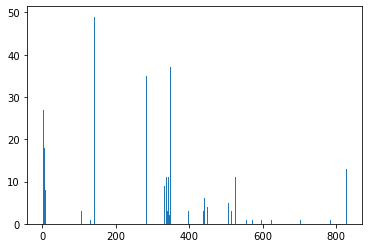

In [31]:
plt.bar(data=parentId, x='parentId', height='idcount')

In [32]:
# would shrink the dimensions of locationId (mapping to 102 instead of over 800)
# would be useful, but not sure what it means
# list of locations have 4 levels - country to province to region to area

In [33]:
df_listings = pd.merge(left=df_listings, right=df_locations, left_on='locationId', right_on='id', how='left')

In [34]:
df_listings.drop('id', axis=1, inplace=True)

In [35]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parentId
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1,v_large,269.0
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2,v_large,269.0
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3,v_large,269.0
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4,v_large,269.0
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5,v_large,269.0


In [36]:
df_listings.groupby('parentId')['id_clean'].count().reset_index()

,parentId,id_clean
0,0.0,8
1,1.0,1680
2,2.0,4428
3,3.0,19691
4,4.0,5526
...,...,...
65,611.0,59
66,614.0,116
67,615.0,38
68,624.0,14


In [37]:
df_listings.parentId.nunique()

70

In [38]:
df_listings.parentId.isna().sum()

7

In [39]:
df_listings.parentId.dtype

dtype('float64')

In [40]:
df_listings.rename(columns={'parentId':'parent_locId'}, inplace=True)

In [41]:
def plot_bar_counts(data, x, y):
    datagrouped = data.groupby(x)[y].count().reset_index(name=y+' count')

    plt.subplots(figsize=(10,6))
    plt.bar(
        data=datagrouped,
        x=datagrouped[x].astype(str),
        height=datagrouped[y+' count']) 
    plt.xticks(rotation=90)
    

    # plt.width(0, max(datagrouped[y+' count']))

    return plt.show()

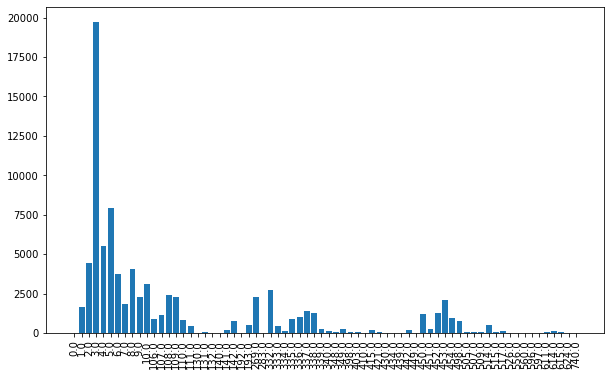

In [42]:
plot_bar_counts(df_listings, 'parent_locId', 'id_clean')

In [43]:
# locationId probably good to drop, non-sensical so far, and most parent Ids seem to come from one parent source (3) 

#### TypeID

In [44]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1,v_large,269.0
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2,v_large,269.0
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3,v_large,269.0
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4,v_large,269.0
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5,v_large,269.0


In [45]:
df_types = pd.read_csv(path + 'types.csv')

In [46]:
df_types.head()

,id,groupName
0,1,apartment
1,2,apartment
2,3,apartment
3,4,house
4,5,house


In [47]:
df_listings = pd.merge(left=df_listings, right=df_types, left_on='typeId', right_on='id', how='left')

In [48]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,...,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId,id,groupName
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,...,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1,v_large,269.0,4.0,house
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2,v_large,269.0,4.0,house
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,...,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3,v_large,269.0,12.0,house
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4,v_large,269.0,10.0,house
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,...,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5,v_large,269.0,10.0,house


In [49]:
df_listings.drop('id', axis=1, inplace=True)

In [50]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId,groupName
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,NaN,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1,v_large,269.0,house
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2,v_large,269.0,house
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3,v_large,269.0,house
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,NaN,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4,v_large,269.0,house
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,NaN,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5,v_large,269.0,house


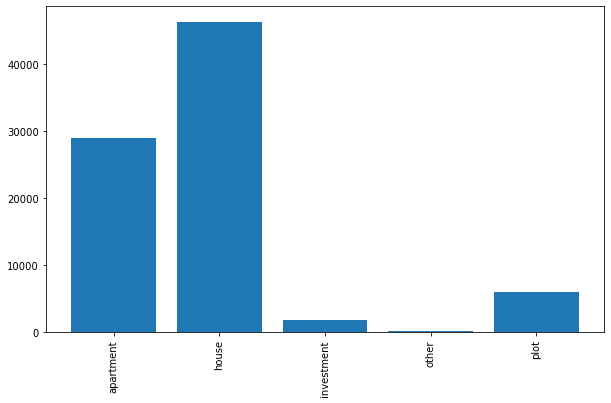

In [51]:
plot_bar_counts(df_listings, 'groupName', 'id_clean')

In [52]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook_connected'

def px_plot_bar_means(df, x, y):
    groupedData=df.groupby(x)[y].mean().reset_index(name=y+' mean')
    
    fig = px.bar(groupedData, x=x, y=y+' mean')
    fig.show()

def px_plot_bar_median(df, x, y):
    groupedData=df.groupby(x)[y].median().reset_index(name=y+' median')
    
    fig = px.bar(groupedData, x=x, y=y+' median')
    fig.show()

def px_plot_bar_counts(df, x, y):
    groupedData=df.groupby(x)[y].count().reset_index(name=y+' count')
    
    fig = px.bar(groupedData, x=x, y=y+' count')
    fig.show()

In [53]:
px_plot_bar_counts(df_listings, x='groupName', y='id_clean')

In [54]:
df_listings.typeId.isna().sum()

2

In [55]:
df_listings[df_listings['typeId'].isna()]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId,groupName
41743,90.0,164.0,NaN,1999000,3.0,NaN,NaN,189221.0,NaN,NaN,NaN,Neubauvorhaben theVIEW an der Hohenfelder Bucht,"im zentralen Stadtteil Hohenfelde, direkt an d...",NaN,53.5634,10.0179,53006,large,142.0,NaN
48960,158.0,81.0,NaN,695000,NaN,3.0,2.0,200.0,NaN,NaN,NaN,Stonehouse mit garden in the outskirts of Sóll...,NaN,NaN,NaN,NaN,62109,medium,9.0,NaN


In [56]:
df_listings[df_listings['groupName']=='other']

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId,groupName
6537,171.0,97.0,15.0,NaN,NaN,10.0,9.0,NaN,2496.0,6497.0,NaN,casa chameleon in son vida viewing the city an...,Ref. 10226\nCasa “Chameleon” in son vida viewi...,NaN,NaN,NaN,8118,v_small,269.0,other
8573,6.0,78.0,15.0,3900000.0,NaN,3.0,2.0,350.0,NaN,350.0,NaN,Unique property in Llucalcari,This unique property of the 15th Century is lo...,NaN,NaN,NaN,10812,v_large,9.0,other
10208,4.0,14.0,15.0,429000.0,NaN,2.0,2.0,86.0,NaN,NaN,NaN,New built apartments walking distance to the C...,It is a newly built complex located Camp de Ma...,Newly built apartments located in the resort o...,NaN,NaN,12802,v_large,3.0,other
10704,4.0,207.0,15.0,240000.0,NaN,2.0,2.0,85.0,NaN,NaN,NaN,New built luxurious apartments first sea line ...,It is a newly built high-end material developm...,Luxury apartments with new construction locate...,NaN,NaN,13486,v_large,6.0,other
10959,4.0,85.0,15.0,384000.0,NaN,2.0,1.0,70.0,NaN,NaN,NaN,Lovely refurbished flat in the old town of Pal...,It is a completely renovated apartment in a bu...,Lovely refurbished flat in the old town of Pal...,NaN,NaN,13805,v_large,10.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81584,82.0,498.0,15.0,38000.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,Parking - Palma de Mallorca (Casco Antiguo),", Built Surface 9m2",Parking INCLUIDO,39.5781,2.64738,103109,v_large,2.0,other
81673,38.0,27.0,15.0,1400000.0,NaN,4.0,4.0,220.0,NaN,NaN,NaN,4 bedroom fully reformed property in Nova Sant...,"Fully reformed to the highest standards, 4 bed...",NaN,NaN,NaN,103220,v_large,3.0,other
81924,337.0,336.0,15.0,450000.0,NaN,NaN,1.0,146.0,NaN,NaN,NaN,Other - Other,FREEHOLD - Freehold bussiness premises suitabl...,Setting :\n\nTown\nFurniture :\n\nFully Furnished,NaN,NaN,103572,v_large,332.0,other
82423,292.0,479.0,15.0,84720.0,NaN,NaN,NaN,96.0,NaN,NaN,NaN,Garage for Sale in Es Castell,"Garage for 4 cars, automatic door.",Gross Area 96.00,NaN,NaN,104261,v_large,453.0,other


In [57]:
# drop missing
df_listings = df_listings.dropna(subset='typeId', axis=0)

In [58]:
# potentially remove listings in other, only 169 in them, and very messy

#### Price

In [59]:
df_listings['price']= df_listings.price.astype(float)

In [60]:
df_listings.price.isna().sum()

6176

In [61]:
df_listings.loc[df_listings['price'].isna()]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude,longitude,id_clean,source_cat,parent_locId,groupName
14,13.0,98.0,12.0,NaN,NaN,13.0,13.0,2700.0,2700.0,2100000.0,NaN,Large country estate with beautiful sea views,The property covers some 210 hectares and has ...,"Sea view, \n\t\t\t\t\tMountain view, \n\t\t\t\...",NaN,NaN,15,v_large,498.0,house
15,14.0,77.0,12.0,NaN,NaN,20.0,NaN,2701.0,NaN,NaN,NaN,Large Estate with private sea access on West C...,How about a little piece of paradise? \n\nSon ...,NaN,NaN,NaN,16,v_large,9.0,house
16,10.0,77.0,4.0,NaN,NaN,22.0,NaN,2500.0,NaN,2107500.0,NaN,Rustic country home with sea/mountains views i...,Region\n\nBanyalbufar is a lovely village situ...,NaN,NaN,NaN,17,v_large,9.0,house
17,37.0,77.0,4.0,NaN,NaN,20.0,NaN,2701.0,NaN,2107500.0,NaN,Large Estate with private sea access on West C...,How about a little piece of paradise? Son Vale...,NaN,NaN,NaN,18,v_large,9.0,house
19,78.0,9.0,4.0,NaN,NaN,8.0,9.0,2900.0,NaN,2100000.0,NaN,Huge historic country house and estate for sal...,This outstanding country property - 20km from ...,"Swimming pool,Waterfront,Sea views,Terrace,Gar...",40.4637,-3.74922,20,medium,2.0,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83016,306.0,117.0,10.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,"Casa Brindis, Vista Alegre","Located on the cliffs of Vista Alegre, Casa Br...","Region, Type, Bedrooms, Bathrooms, Tennis cour...",NaN,NaN,105002,small,109.0,house
83033,367.0,577.0,1.0,NaN,3.0,3.0,2.0,105.0,105.0,NaN,NaN,Sunny high floor in Can Matas,Located on the border with Parc Central Can Ma...,"Elevator, Terrace, Air conditioning, Swimming ...",NaN,NaN,105025,v_large,515.0,apartment
83040,216.0,120.0,10.0,NaN,NaN,5.0,5.0,NaN,450.0,50000.0,NaN,Villa Oasis,Property DescriptionAmazing luxury house in KM...,"satellite TV,fully equipped kitchen,sea view,p...",NaN,NaN,105032,medium,109.0,house
83049,141.0,107.0,1.0,NaN,NaN,4.0,3.0,NaN,120.0,NaN,NaN,Lovely renovated loft style apartment in Ibiza...,NaN,"Separate studio and garden,New installations,C...",NaN,NaN,105044,small,106.0,apartment


In [62]:
df_listings.shape

(83049, 20)

In [63]:
# drop rows missing prices 
df_listings = df_listings.dropna(subset='price', axis=0)

In [64]:
df_listings.price.describe()

count    7.687300e+04
mean     1.264403e+06
std      2.161149e+06
min      4.500000e+02
25%      3.000000e+05
50%      6.200000e+05
75%      1.450000e+06
max      1.450000e+08
Name: price, dtype: float64

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



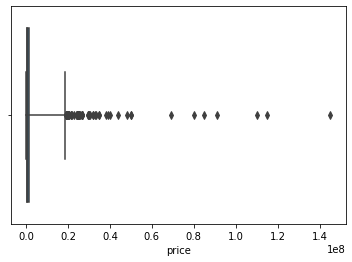

In [65]:
sns.boxplot(df_listings['price'], whis=15)
plt.show()

In [66]:
# remove values greater than 60,000,000, based on boxplot 

In [67]:
df_listings = df_listings.loc[df_listings['price']<60000000]

In [68]:
# create a log column to normalize the data 
df_listings['log_price'] = round(np.log(df_listings['price']),3)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



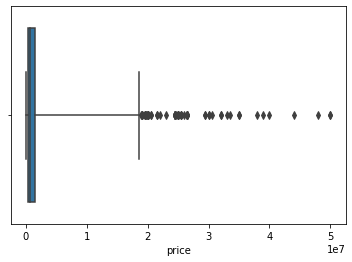

In [69]:
# rechecking
sns.boxplot(df_listings['price'], whis=15)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='log_price'>

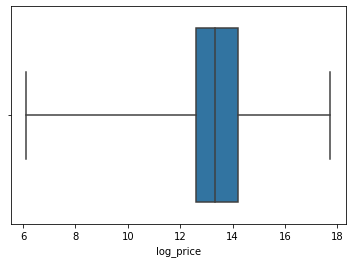

In [70]:
sns.boxplot((df_listings['log_price']), whis=15)

In [71]:
df_listings.price.describe()

count    7.686600e+04
mean     1.255477e+06
std      1.934863e+06
min      4.500000e+02
25%      3.000000e+05
50%      6.200000e+05
75%      1.450000e+06
max      5.000000e+07
Name: price, dtype: float64

In [72]:
price_cutLabels = ['v_low','low','medium','high','v_high']
df_listings['price_cats'] = pd.qcut(
    df_listings['price'],
    q=[0,0.20,0.4,0.6,0.8,1],
    labels=price_cutLabels)

In [73]:
df_listings.price_cats.value_counts()

high      15612
v_low     15411
medium    15373
low       15343
v_high    15127
Name: price_cats, dtype: int64

In [74]:
print(df_listings.groupby('price_cats')['price'].min())
print(df_listings.groupby('price_cats')['price'].max())

price_cats
v_low         450.0
low        262650.0
medium     470640.0
high       817000.0
v_high    1755000.0
Name: price, dtype: float64
price_cats
v_low       262500.0
low         470000.0
medium      815000.0
high       1750000.0
v_high    50000000.0
Name: price, dtype: float64


#### Rooms - Bedrooms - Bathrooms

In [75]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,...,description,features,latitude,longitude,id_clean,source_cat,parent_locId,groupName,log_price,price_cats
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,...,"Strength, tradition and serenity around 10,000...","Fireplace, Guest apartment, Air conditioning, ...",NaN,NaN,1,v_large,269.0,house,17.093,v_high
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,2,v_large,269.0,house,17.093,v_high
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,3,v_large,269.0,house,17.093,v_high
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,Magnificent Mallorquinian Mansion of XVII cent...,NaN,NaN,NaN,4,v_large,269.0,house,17.093,v_high
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,...,Magnificent Mallorquinian Mansion of XVII cent...,".,Air Condition,Garden Use,in Mint Condition,P...",NaN,NaN,5,v_large,269.0,house,17.093,v_high


In [76]:
# get percent missing 
(df_listings.rooms.isna().sum()/len(df_listings))*100

89.73668461998803

In [77]:
# just drop rooms
# df_listings_types = df_listings_types.drop('rooms', axis=1)

#### Bedrooms

In [78]:
# impute with missings

In [79]:
px_plot_bar_median(df_listings, x='groupName', y='bedrooms')

In [80]:
df_listings.isna().sum()

sourceId            0
locationId          6
typeId              0
price               0
rooms           68977
bedrooms        11956
bathrooms       13713
totalArea       23973
livingArea      48709
plotArea        36098
terraceArea     60965
title            3742
description      2440
features        37880
latitude        62283
longitude       62497
id_clean            0
source_cat          0
parent_locId        6
groupName           0
log_price           0
price_cats          0
dtype: int64

In [81]:
(df_listings.bedrooms.isna().sum()/len(df_listings))*100

15.554341321260376

In [82]:
(df_listings.bathrooms.isna().sum()/len(df_listings))*100

17.8401373819374

In [83]:
room_diffs = df_listings[['bedrooms','bathrooms','rooms','price_cats','groupName']]

In [84]:
# impute missing bedrooms and bathrooms with median rooms from price_category and group...
room_diffs['bedrooms_filled_median_Group'] = room_diffs['bedrooms'].fillna(room_diffs.groupby('groupName')['bedrooms'].transform('median'))
room_diffs['bathrooms_filled_median_Group'] = room_diffs['bathrooms'].fillna(room_diffs.groupby('groupName')['bathrooms'].transform('median'))

In [85]:
# use this ** # round to no decimals 
room_diffs['bedrooms_filled_median_priceGroup_2'] = room_diffs.groupby(['price_cats','groupName'])['bedrooms'].transform(lambda x: x.fillna(round(x.median(),0)))
room_diffs['bathrooms_filled_median_priceGroup_2'] = room_diffs.groupby(['price_cats','groupName'])['bathrooms'].transform(lambda x: x.fillna(round(x.median(),0)))

In [86]:
room_diffs.describe()

,bedrooms,bathrooms,rooms,bedrooms_filled_median_Group,bathrooms_filled_median_Group,bedrooms_filled_median_priceGroup_2,bathrooms_filled_median_priceGroup_2
count,64910.000000,63153.000000,7889.000000,76866.000000,76866.000000,76866.000000,76866.000000
mean,3.864597,2.950216,4.618583,3.874301,2.985663,3.809096,2.915971
std,13.059343,3.630392,2.676273,12.002417,3.307963,12.010821,3.344587
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000
50%,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,2.000000
75%,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000,4.000000
max,3170.000000,440.000000,48.000000,3170.000000,440.000000,3170.000000,440.000000


/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bedrooms_filled_median_priceGroup_2', ylabel='count'>

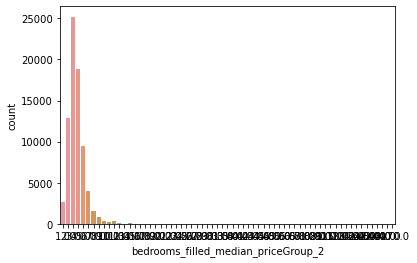

In [87]:
sns.countplot(room_diffs['bedrooms_filled_median_priceGroup_2'])

In [88]:
room_diffs.groupby('price_cats')['bedrooms'].median()

price_cats
v_low     2.0
low       3.0
medium    3.0
high      4.0
v_high    5.0
Name: bedrooms, dtype: float64

In [89]:
room_diffs.groupby('groupName')['bedrooms'].median()

groupName
apartment     3.0
house         4.0
investment    5.0
other         3.0
plot          4.0
Name: bedrooms, dtype: float64

In [90]:
room_diffs[room_diffs['bedrooms_filled_median_priceGroup_2']==4.5]

,bedrooms,bathrooms,rooms,price_cats,groupName,bedrooms_filled_median_Group,bathrooms_filled_median_Group,bedrooms_filled_median_priceGroup_2,bathrooms_filled_median_priceGroup_2


In [91]:
room_diffs.isna().sum()

bedrooms                                11956
bathrooms                               13713
rooms                                   68977
price_cats                                  0
groupName                                   0
bedrooms_filled_median_Group                0
bathrooms_filled_median_Group               0
bedrooms_filled_median_priceGroup_2         0
bathrooms_filled_median_priceGroup_2        0
dtype: int64

In [92]:
rooms_diffs_grouped = room_diffs.groupby(['price_cats','groupName'])['bedrooms'].median().reset_index()

In [93]:
rooms_diffs_grouped.head()

,price_cats,groupName,bedrooms
0,v_low,apartment,2.0
1,v_low,house,3.0
2,v_low,investment,2.0
3,v_low,other,3.0
4,v_low,plot,3.0


In [94]:
room_diffs[(room_diffs['bedrooms'].isna()) & (~room_diffs['rooms'].isna())].sample(10)

,bedrooms,bathrooms,rooms,price_cats,groupName,bedrooms_filled_median_Group,bathrooms_filled_median_Group,bedrooms_filled_median_priceGroup_2,bathrooms_filled_median_priceGroup_2
57896,NaN,NaN,3.0,high,house,4.0,3.0,4.0,3.0
46789,NaN,1.0,1.0,v_low,apartment,3.0,1.0,2.0,1.0
47152,NaN,2.0,4.0,low,apartment,3.0,2.0,3.0,2.0
81811,NaN,3.0,3.0,v_high,house,4.0,3.0,5.0,3.0
77289,NaN,5.0,7.0,v_high,house,4.0,5.0,5.0,5.0
44222,NaN,2.0,4.0,high,house,4.0,2.0,4.0,2.0
49286,NaN,1.0,1.0,high,house,4.0,1.0,4.0,1.0
59112,NaN,1.0,3.0,medium,house,4.0,1.0,4.0,1.0
59353,NaN,2.0,3.0,v_low,apartment,3.0,2.0,2.0,2.0
41767,NaN,NaN,7.0,low,house,4.0,3.0,3.0,2.0


In [95]:
df_listings['bedrooms_filled_median'] = df_listings.groupby(['price_cats','groupName'])['bedrooms'].transform(lambda x: x.fillna(round(x.median(),0)))
df_listings['bathrooms_filled_median'] = df_listings.groupby(['price_cats','groupName'])['bathrooms'].transform(lambda x: x.fillna(round(x.median(),0)))

<AxesSubplot:xlabel='count', ylabel='bedrooms_filled_median'>

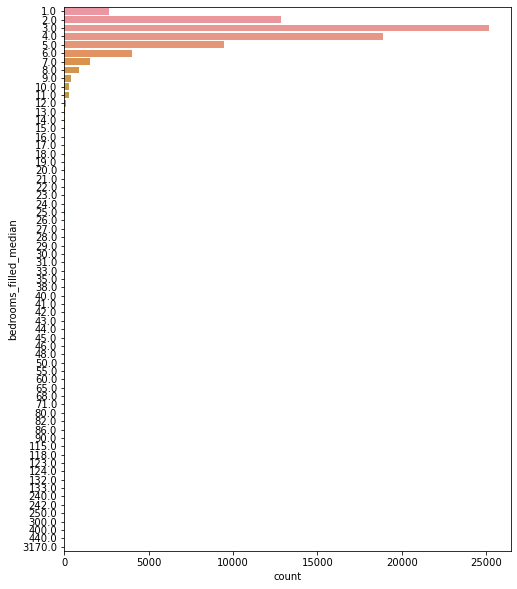

In [96]:
plt.subplots(figsize=(8,10))
sns.countplot(data=df_listings, y='bedrooms_filled_median')

In [97]:
df_listings.loc[df_listings['bathrooms_filled_median']>100].iloc[:,0:15]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude
39047,77.0,2.0,17.0,10600000.0,NaN,240.0,240.0,14775.0,14775.0,12589.0,4136.0,Baleares Hotels investment in Mallorca,Fabulous Hotel in South East of Mallorca. This...,"2 Community Pools,24 Hour Reception,5-10 minut...",NaN
56981,296.0,450.0,18.0,33000000.0,NaN,440.0,440.0,NaN,NaN,52800.0,NaN,Two Impressive Beachside Apart Hotels with ove...,Opportunity to acquire 2 impressive hotels in...,NaN,NaN
60313,86.0,121.0,18.0,7000000.0,NaN,242.0,242.0,NaN,NaN,NaN,NaN,4 Star Hotel for sal in San Antonio,4 Star Hotel for sal in San AntonioAttractive ...,NaN,NaN
63060,77.0,91.0,18.0,8500000.0,NaN,133.0,133.0,NaN,6328.0,1502.0,NaN,Baleares 4 star Hotel with beautiful spa and p...,This fabulous 4 star Hotel is located only 350...,NaN,NaN
71857,86.0,27.0,18.0,12000000.0,NaN,123.0,123.0,NaN,NaN,NaN,NaN,Luxus Aparthotel for sale in Mallorca,This property is a 5-minute walk from the beac...,NaN,NaN
71858,86.0,27.0,1.0,11000000.0,NaN,400.0,400.0,NaN,NaN,NaN,NaN,Apartmenthotel auf Mallorca for sale,Hotel is only 2 minutes walk from the beach. L...,NaN,NaN
74838,86.0,114.0,18.0,13900000.0,NaN,115.0,115.0,NaN,NaN,NaN,NaN,Hotel with 115 rooms for sale with 4 stars,This Hotel with 115 rooms is a 5-minute walk f...,NaN,NaN
80165,82.0,105.0,1.0,80000.0,NaN,2.0,220.0,86.0,86.0,NaN,81.0,Ground floor - Sant Joan,", Built Surface 86m2, 81m2, 2 Bedrooms, 220 B...","Terrace,Built-in Wardrobes,Storage room,Heatin...",39.5925


In [98]:
# changing typo of 220
df_listings.at[80165,'bathrooms_filled_median']=2
df_listings.at[80165,'bathrooms']=2

In [99]:
df_listings.price.dtype

dtype('float64')

In [100]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,...,latitude,longitude,id_clean,source_cat,parent_locId,groupName,log_price,price_cats,bedrooms_filled_median,bathrooms_filled_median
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,...,NaN,NaN,1,v_large,269.0,house,17.093,v_high,10.0,16.0
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,NaN,NaN,2,v_large,269.0,house,17.093,v_high,10.0,12.0
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,...,NaN,NaN,3,v_large,269.0,house,17.093,v_high,10.0,12.0
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,NaN,NaN,4,v_large,269.0,house,17.093,v_high,10.0,12.0
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,...,NaN,NaN,5,v_large,269.0,house,17.093,v_high,10.0,12.0


In [101]:
bedroom_cat_labels = ['1','2','3','4','5','6+']
df_listings['bedroom_cats'] = pd.cut(
    df_listings['bedrooms_filled_median'],
    bins=[0,1,2,3,4,5,5000],
    labels=bedroom_cat_labels)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bedroom_cats', ylabel='count'>

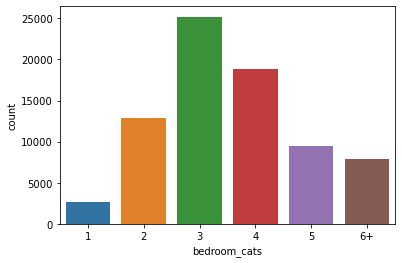

In [102]:
sns.countplot(df_listings['bedroom_cats'])

<AxesSubplot:xlabel='count', ylabel='bathrooms_filled_median'>

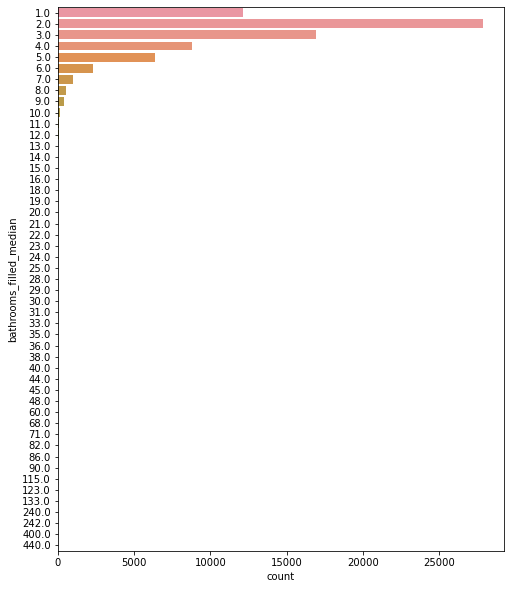

In [103]:
plt.subplots(figsize=(8,10))
sns.countplot(data=df_listings, y='bathrooms_filled_median')

In [104]:
bath_cat_labels = ['1','2','3','4','5','6+']
df_listings['bathroom_cats'] = pd.cut(
    df_listings['bathrooms_filled_median'],
    bins=[0,1,2,3,4,5,5000],
    labels=bath_cat_labels)

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bathroom_cats', ylabel='count'>

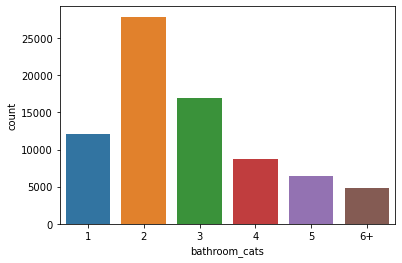

In [105]:
sns.countplot(df_listings['bathroom_cats'])

#### Area

In [106]:
df_listings.head()

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,...,id_clean,source_cat,parent_locId,groupName,log_price,price_cats,bedrooms_filled_median,bathrooms_filled_median,bedroom_cats,bathroom_cats
0,1.0,84.0,4.0,26500000.0,20.0,10.0,16.0,4000.0,2800.0,820000.0,...,1,v_large,269.0,house,17.093,v_high,10.0,16.0,6+,6+
1,9.0,84.0,4.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,2,v_large,269.0,house,17.093,v_high,10.0,12.0,6+,6+
2,14.0,84.0,12.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,NaN,...,3,v_large,269.0,house,17.093,v_high,10.0,12.0,6+,6+
3,37.0,84.0,10.0,26500000.0,NaN,10.0,12.0,3000.0,NaN,1200000.0,...,4,v_large,269.0,house,17.093,v_high,10.0,12.0,6+,6+
4,85.0,84.0,10.0,26500000.0,NaN,10.0,12.0,NaN,NaN,1200000.0,...,5,v_large,269.0,house,17.093,v_high,10.0,12.0,6+,6+


In [107]:
df_areas = df_listings[['totalArea', 'livingArea', 'plotArea', 'price_cats', 'groupName', 'bedroom_cats', 'bathroom_cats', 'title','description']]

In [108]:
df_areas.head()

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description
0,4000.0,2800.0,820000.0,v_high,house,6+,6+,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000..."
1,3000.0,NaN,1200000.0,v_high,house,6+,6+,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...
2,3000.0,NaN,NaN,v_high,house,6+,6+,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...
3,3000.0,NaN,1200000.0,v_high,house,6+,6+,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...
4,NaN,NaN,1200000.0,v_high,house,6+,6+,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...


In [109]:
df_areas.isna().sum()

totalArea        23973
livingArea       48709
plotArea         36098
price_cats           0
groupName            0
bedroom_cats         0
bathroom_cats        0
title             3742
description       2440
dtype: int64

In [110]:
df_areas[(df_areas['totalArea'].isna()) & (~df_areas['livingArea'].isna())].sample(10)

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description
21755,NaN,309.0,NaN,high,apartment,4,3,NaN,In a quiet and popular residential area of Cas...
44300,NaN,450.0,2000.0,v_high,house,5,4,LUXURY EL VILA,The amazing Villa offers stunning views of the...
45110,NaN,280.0,24000.0,high,house,4,3,Beautiful rustic house near Trenc,Beautiful Finca between Campos and Sa Rapita b...
23759,NaN,123.0,NaN,medium,apartment,2,2,Fantastic apartment in a sought after resident...,The living area of 125 m2 plus 18 m2 of covere...
7024,NaN,360.0,620.0,high,house,6+,4,Spectacular villa from 1850 in El Terreno,Spectacular villa from 1850 in El TerrenoThis ...
51512,NaN,106.0,NaN,low,apartment,3,2,NaN,"Located a stones throw away from the sea, this..."
64069,NaN,155.0,NaN,high,apartment,3,3,"Apartment for sale in Rio Real, Marbella East....",Apartment at Rio Real Playa on first floor the...
75739,NaN,270.0,8500.0,v_high,house,5,4,Rural property with sea views and natural ston...,This marvelous country estate is located on a ...
66691,NaN,310.0,1043.0,high,house,4,4,"Villa for sale in Santa Clara, Marbella East. ...",This contemporary villa forms part of a high-e...
25690,NaN,370.0,2122.0,v_high,house,4,5,PROJECT; New contemporary Bungalow - Villa,South facing.\n\n\t\t\t\tThe living area of 38...


In [111]:
# fill nas in totalArea from living Area - because they are highly correlated
df_areas['totalArea_living'] = df_areas['totalArea'].fillna(df_areas['livingArea'])

In [112]:
df_areas[(df_areas['totalArea'].isna()) & (~df_areas['livingArea'].isna())].sample(10)

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description,totalArea_living
47906,NaN,400.0,15321.0,v_high,house,5,5,Magnificent newly built house with remarkable ...,The newly built stone country house situated o...,400.0
69431,NaN,122.0,NaN,v_low,apartment,2,2,Lovely ground floor apartment with garden and ...,Beautiful Ground Floor apartment in Los Altos ...,122.0
15557,NaN,300.0,1200.0,high,house,4,3,Modern Villa in Costa de los Pinos with direct...,Beautiful and spacious newly built villa locat...,300.0
16423,NaN,505.0,30000.0,high,house,5,4,"Substantial, newly built Finca by Montuiri",The finca is located in the hilly countryside ...,505.0
51137,NaN,160.0,NaN,medium,apartment,3,2,ID: 1251 Portocolom - Apartment with sea and h...,The apartment is a triplex with incomparable h...,160.0
16750,NaN,130.0,NaN,v_low,house,3,2,Terraced house for sale between Capdepera and ...,"A surface of 130m2, located in a complex of si...",130.0
45232,NaN,188.0,530.0,medium,house,3,2,Well together family house with private swimmi...,Well together family house with private swimmi...,188.0
69411,NaN,180.0,NaN,low,house,3,2,Cozy rustic style townhouse in Estepona,"This lovely, spacious and bright townhouse is ...",180.0
73224,NaN,600.0,135000.0,high,house,2,1,NaN,Rural property with 278m2 country house comple...,600.0
43219,NaN,85.0,NaN,low,apartment,2,2,Beautiful Garden Apartment Above Port Adriano,An immaculate garden apartment enjoying views ...,85.0


In [113]:
df_areas.totalArea_living.isna().sum()

12680

In [114]:
df_areas[(df_areas['totalArea'].isna())]

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description,totalArea_living
4,NaN,NaN,1200000.0,v_high,house,6+,6+,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,NaN
20,NaN,2800.0,2108000.0,v_high,house,6+,6+,Substantial estate in a uniquely beautiful loc...,This spectacular Mallorcan finca overlooks a f...,2800.0
21,NaN,2900.0,2100000.0,v_high,house,5,5,Mansion of 210 acres overlooking the ocean,Property description\n \n ...,2900.0
23,NaN,2300.0,2100000.0,v_high,house,6+,5,"Mallorca, large country house with access to t...",Large Mallorcan country house located on the n...,2300.0
43,NaN,1800.0,3000.0,v_high,house,6+,5,NEWLY BUILT : Exclusive high-end villa with br...,South facing. \n\n\t\t\t\tThe constructed livi...,1800.0
...,...,...,...,...,...,...,...,...,...,...
83014,NaN,265.0,27000.0,v_high,house,4,3,Pollensa traditional country home in contempor...,Pollensa country house for sale in the Vall de...,265.0
83022,NaN,NaN,2902.0,v_high,investment,6+,6+,3.000m2 Plot with Sea Views in Camoján with Bu...,Great opportunity to purchase one of the last ...,NaN
83029,NaN,420.0,1050.0,medium,house,6+,3,Fantastic family house in Marbella. Great Loca...,Great property of 6 bedrooms and 3 bathrooms. ...,420.0
83041,NaN,78.0,540.0,v_low,house,2,1,NaN,Small villa with many possibilities built on a...,78.0


In [115]:
px_plot_bar_means(df_areas, x='groupName', y='totalArea_living')

In [116]:
px_plot_bar_median(df_areas, x='groupName', y='totalArea_living')

In [117]:
df_areas_grouped = df_areas.groupby(['groupName','price_cats'])['totalArea_living'].median().reset_index()

In [118]:
df_areas_grouped.head()

,groupName,price_cats,totalArea_living
0,apartment,v_low,82.0
1,apartment,low,109.0
2,apartment,medium,142.0
3,apartment,high,185.0
4,apartment,v_high,290.0


<AxesSubplot:xlabel='groupName', ylabel='totalArea_living'>

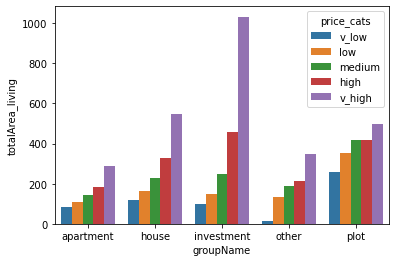

In [119]:
sns.barplot(data=df_areas_grouped, x='groupName', y='totalArea_living', hue='price_cats')

In [120]:
# fill with medians from groups of price and type..
df_areas['totalArea_living'] = df_areas.groupby(['price_cats','groupName'])['totalArea_living'].transform(lambda x: x.fillna(round(x.median(),0)))

In [121]:
df_areas.isna().sum()

totalArea           23973
livingArea          48709
plotArea            36098
price_cats              0
groupName               0
bedroom_cats            0
bathroom_cats           0
title                3742
description          2440
totalArea_living        0
dtype: int64

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='totalArea_living'>

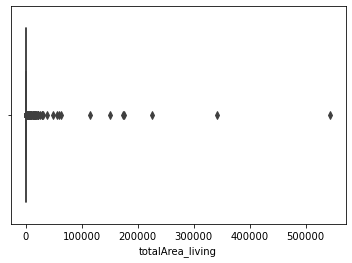

In [122]:
sns.boxplot(df_areas['totalArea_living'])

In [123]:
livingArea_labels = ['v_small', 'small','medium','large','v_large']
df_areas['totalLivingArea_cats'] = pd.qcut(
    df_areas['totalArea_living'],
    q=[0,0.2,0.4,0.6,0.8,1.0],
    labels=livingArea_labels)

In [124]:
df_areas.totalLivingArea_cats.value_counts()

large      16012
small      15494
v_small    15374
medium     15299
v_large    14687
Name: totalLivingArea_cats, dtype: int64

In [125]:
print(df_areas.groupby('totalLivingArea_cats')['totalArea_living'].min())
print(df_areas.groupby('totalLivingArea_cats')['totalArea_living'].max())

totalLivingArea_cats
v_small      1.0
small      107.0
medium     166.0
large      261.0
v_large    421.0
Name: totalArea_living, dtype: float64
totalLivingArea_cats
v_small       106.0
small         165.0
medium        260.0
large         420.0
v_large    544060.0
Name: totalArea_living, dtype: float64


In [126]:
# transfer ops to listings 

#### Plot area

In [127]:
print(df_areas.plotArea.isna().sum())
print(df_areas.plotArea.isna().sum()/df_areas.shape[0])

36098
0.46962245986522


In [128]:
df_areas[(df_areas['plotArea'].isna()) & (~df_areas['totalArea'].isna())].sample(10)

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description,totalArea_living,totalLivingArea_cats
79638,105.0,NaN,NaN,v_low,apartment,1,1,Apartment - Middle Floor,"1 bedroom apartment, 1 bathroom, living room w...",105.0,v_small
78926,113.0,113.0,NaN,low,apartment,3,1,Centric and renewed apartment for sale in Eixa...,"This first floor, ready to move in, has recent...",113.0,small
40680,92.0,80.0,NaN,v_low,apartment,3,1,Penthouse - Palma de Mallorca (El Molinar),", Useful surface 80m2, 40m2, 3 Bedrooms, 1 Ba...",92.0,v_small
7700,99.0,NaN,NaN,low,apartment,2,2,MALLORCA PROPERTIES : SAN TELMO APARTMENT - RE...,A 2 bedroom sea view apartment in a recently b...,99.0,v_small
67223,124.0,NaN,NaN,low,apartment,3,2,Nice groundfloor apartment with 3 bedrooms,This wonderful apartment is placed on the grou...,124.0,small
66962,78.0,NaN,NaN,medium,apartment,2,2,"2 bedroom Apartment in Marbella, Andalucia for...",Great opportunity to acquire an apartment with...,78.0,v_small
8031,178.0,178.0,NaN,high,house,3,3,Terraced house in first sea line in Puerto de ...,Renovated terraced house at the end of a cul-d...,178.0,medium
36907,74.0,74.0,NaN,v_low,apartment,2,1,Flat for sale E...,"Surface 74 m², 2 bedrooms (2 doubles), 1 bat...",74.0,v_small
6449,54.0,NaN,NaN,v_low,apartment,2,1,Beautiful apartment close to the beach,This beautiful apartment is situated in front ...,54.0,v_small
49370,50.0,NaN,NaN,v_low,apartment,2,1,Beautiful penthouse for sale with two private ...,NaN,50.0,v_small


In [129]:
df_areas_grouped_plot = df_areas.groupby(['groupName','price_cats'])['plotArea'].median().reset_index()

In [130]:
df_areas_grouped_plot.head()

,groupName,price_cats,plotArea
0,apartment,v_low,98.0
1,apartment,low,134.0
2,apartment,medium,185.0
3,apartment,high,215.0
4,apartment,v_high,330.0


<AxesSubplot:xlabel='groupName', ylabel='plotArea'>

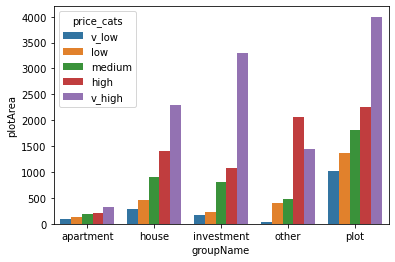

In [131]:
sns.barplot(data=df_areas_grouped_plot, x='groupName', hue='price_cats', y='plotArea')

In [132]:
df_areas_grouped_plot2 = df_areas.groupby(['price_cats','totalLivingArea_cats'])['plotArea'].median().reset_index()

<AxesSubplot:xlabel='price_cats', ylabel='plotArea'>

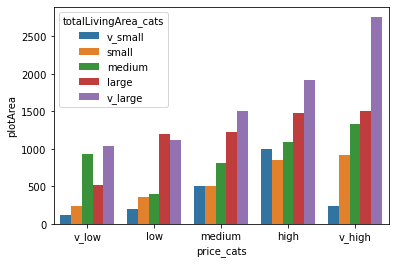

In [133]:
sns.barplot(data=df_areas_grouped_plot2, x='price_cats', hue='totalLivingArea_cats', y='plotArea')

In [134]:
px_plot_bar_median(df_areas, x='totalLivingArea_cats', y='plotArea')

In [135]:
# fill with medians from groupby of price and totallivingArea_cat....
df_areas['plotArea_filled'] = df_areas.groupby(['price_cats','totalLivingArea_cats'])['plotArea'].transform(lambda x: x.fillna(round(x.median(),0)))

/opt/homebrew/Caskroom/miniforge/base/envs/lhl_env38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(0.0, 20000.0)

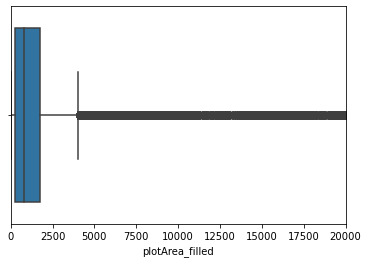

In [150]:
sns.boxplot(df_areas['plotArea_filled'])
plt.xlim(0,20000)

In [151]:
plotArea_labels = ['v_small','small','medium','large','v_large']
df_areas['plotArea_cats'] = pd.qcut(
    df_areas['plotArea_filled'],
    q=[0,0.2,0.4,0.6,0.8,1],
    labels=plotArea_labels)

In [152]:
df_areas.head()

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description,totalArea_living,totalLivingArea_cats,plotArea_filled,plotArea_cats
0,4000.0,2800.0,820000.0,v_high,house,6+,6+,Exquisite manor house amidst the Tramontana va...,"Strength, tradition and serenity around 10,000...",4000.0,v_large,820000.0,v_large
1,3000.0,NaN,1200000.0,v_high,house,6+,6+,Finca in Puigpunyent (Objektnummer KSV00142),Magnificent Mallorquinian Mansion of XVII cent...,3000.0,v_large,1200000.0,v_large
2,3000.0,NaN,NaN,v_high,house,6+,6+,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,3000.0,v_large,2760.0,v_large
3,3000.0,NaN,1200000.0,v_high,house,6+,6+,Magnificent Mallorquinian Mansion of XVII cent...,Magnificent Mallorquinian Mansion of XVII cent...,3000.0,v_large,1200000.0,v_large
4,NaN,NaN,1200000.0,v_high,house,6+,6+,Mallorquinian Mansion of XVII century on the m...,Magnificent Mallorquinian Mansion of XVII cent...,545.0,v_large,1200000.0,v_large


(0.0, 10000.0)

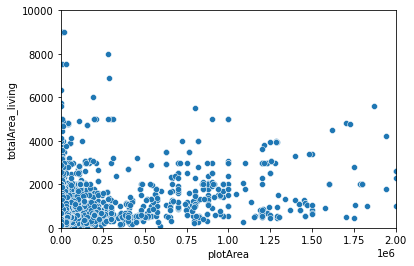

In [137]:
sns.scatterplot(data=df_areas, x='plotArea', y='totalArea_living')
plt.xlim(0,2000000)
plt.ylim(0,10000)

In [138]:
df_areas_grouped_plot = df_areas.groupby(['groupName','totalArea_living'])['plotArea'].median().reset_index()

In [139]:
df_areas[(df_areas['groupName']=='plot') & (df_areas['plotArea'].isna())].sample(10)

,totalArea,livingArea,plotArea,price_cats,groupName,bedroom_cats,bathroom_cats,title,description,totalArea_living,totalLivingArea_cats,plotArea_filled
39841,1400.0,1000.0,NaN,high,plot,4,4,Plot - Manacor (Manacor Centro),Urban Solar sensational provided with all the ...,1400.0,v_large,1920.0
38929,NaN,NaN,NaN,low,plot,3,2,Plots with beautiful sea views for sale in Pol...,Rustic plots with sea views for sale in Pollen...,355.0,large,1204.0
38460,124.0,124.0,NaN,v_low,plot,3,2,Project to reform in Son Españolet,Project to reform in Son EspañoletGreat invest...,124.0,small,240.0
22604,137.0,NaN,NaN,v_low,plot,3,2,"ALC0167POL0 - Plot for sale in Alcúdia, Mallor...",One of urban plots available in Pto.Pollença-A...,137.0,small,240.0
59772,24.0,NaN,NaN,high,plot,4,4,PARCELA VADELLA TAL,"Beautiful plot of hill in Cala Vadella, very p...",24.0,v_small,1000.0
16110,NaN,NaN,NaN,medium,plot,4,3,"Superb plot for sale set in a top location, Ma...",A wonderful building plot of 14.400 m2 with an...,420.0,large,1230.0
33376,290.0,NaN,NaN,medium,plot,4,3,"Seafront building on approx. 210 m2 plot,","approx. 290 m2 built, divided in: restaurant o...",290.0,large,1230.0
41963,NaN,NaN,NaN,medium,plot,4,3,Baugrundstück für ein Appartementhaus im Ortsk...,Grundstück mit Alt-Bestand in kurzer Entfernun...,420.0,large,1230.0
5368,320.0,NaN,NaN,medium,plot,4,4,BON4550BON0 - Plot for sale in Mal Pas-Bonaire...,This amazing sea view plot will be sold with e...,320.0,large,1230.0
51066,NaN,NaN,NaN,v_low,plot,3,2,ID: 140192-solares Grundstücke in Portocolom M...,Mehrere Baugrundstücke am Ortseingang von Port...,256.0,medium,937.0


In [140]:
df_areas.groupName.value_counts()

house         42163
apartment     27188
plot           5724
investment     1622
other           169
Name: groupName, dtype: int64

<AxesSubplot:xlabel='plotArea'>

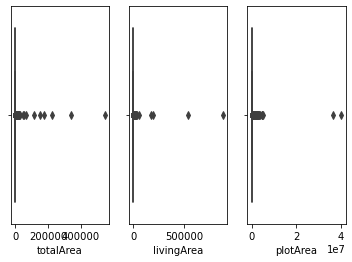

In [141]:
fig, ax = plt.subplots(1,3)
sns.boxplot(x=df_areas['totalArea'], ax=ax[0])
sns.boxplot(x=df_areas['livingArea'], ax=ax[1])
sns.boxplot(x=df_areas['plotArea'], ax=ax[2])


#### Terrace

In [142]:
df_listings.loc[df_listings['terraceArea']==0]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,...,id_clean,source_cat,parent_locId,groupName,log_price,price_cats,bedrooms_filled_median,bathrooms_filled_median,bedroom_cats,bathroom_cats


In [ ]:
df_listings.loc[df_listings['terraceArea']==0]

In [143]:
# binarize this, can maybe extract from features or description if there is a terrace
# i.e. if terrace in features/description add a 1

In [144]:
df_noNA_desc = df_listings[~df_listings.description.isna()]

In [145]:
df_noNA_desc[df_noNA_desc['description'].str.contains('terraza')].iloc[:,0:15]

,sourceId,locationId,typeId,price,rooms,bedrooms,bathrooms,totalArea,livingArea,plotArea,terraceArea,title,description,features,latitude
2908,328.0,49.0,5.0,1800000.0,NaN,6.0,4.0,572.0,NaN,985.0,NaN,Casa en venta en Playa de los franceses,Fantástico chalet en primera línea de la playa...,NaN,NaN
3713,328.0,44.0,4.0,1200000.0,NaN,NaN,NaN,330.0,NaN,14800.0,NaN,Casa de campo en venta en Son Fé,Fantastica finca en una zona privilegiada de A...,NaN,NaN
4022,328.0,44.0,5.0,1200000.0,NaN,4.0,5.0,374.0,NaN,195.0,NaN,Casa en venta en Alcudia,Una verdadera joya situada en el casco antiguo...,NaN,NaN
4405,328.0,44.0,5.0,950000.0,NaN,4.0,3.0,685.0,NaN,1000.0,NaN,Casa en venta en Barcares,Fantástico chalet en segunda línea con vistas ...,NaN,NaN
4719,328.0,44.0,5.0,795000.0,NaN,4.0,2.0,200.0,NaN,132.0,NaN,Casa en venta en Alcudia,"Casa de pueblo con salida a dos calles, consta...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82844,337.0,336.0,1.0,800000.0,NaN,3.0,3.0,200.0,NaN,NaN,15.0,Apartment - Middle Floor,Magnifico apartamento en una de las mejores ur...,NaN,NaN
82967,301.0,474.0,1.0,180000.0,NaN,NaN,1.0,NaN,NaN,60.0,NaN,Apartamento reformado con buenas vistas en Bin...,¡OPORTUNIDAD! APARTAMENTO CON VISTAS AL MAR\nE...,"Salón / comedor, Vista al mar, Terraza, Trastero",39.8339
82996,259.0,32.0,1.0,950000.0,NaN,3.0,3.0,306.0,NaN,NaN,NaN,NaN,Totally renovated original WINDMILL located in...,NaN,NaN
83043,298.0,472.0,10.0,345000.0,NaN,3.0,2.0,123.0,NaN,475.0,NaN,Chalet con piscina y vistas al mar en Binibeca...,Chalet de planta baja con vistas al mar y pisc...,Baños 2 Cocina(s) 1 Lavadero 1 Patio 1 Terraza...,NaN


In [146]:
df_noNA_desc.loc[2908,'description']

'Fantástico chalet en primera línea de la playa, con acceso directo desde la casa a la playa.Consta de 6 habitaciones dobles, 4 baños, 1 aseo, 2 salones comedor (uno en cada planta), cocina, kitchenette, garaje, amplio trastero, sauna, fantáscico jardín con preciosas vistas a la playa que rodea toda la casa, terrazas y porche. Totalmente equipada, con aire acondicionado, calefacción de gasoil, instalación de TV por TDT y  antena parabólica.'

#### 